In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
csv_file_path = '/content/drive/MyDrive/mini proj/balanced_tweets.csv'
df = pd.read_csv(csv_file_path)


In [ ]:
df.head()

,airline_sentiment,clean_tweet
0,neutral,start daily b flights columbus oh oakland aug ...
1,positive,beautiful fleet perfect evening fly
2,negative,beg differ things booked wrong still fixed get...
3,neutral,good point
4,neutral,hear new thing planes fly fi check flight im g...


In [ ]:
# prompt: do labelling for the "airline_sentiment" column. it has 3 classes - positive , negative and neutral

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])

print(df.head())

   airline_sentiment                                        clean_tweet
0                  1  start daily b flights columbus oh oakland aug ...
1                  2                beautiful fleet perfect evening fly
2                  0  beg differ things booked wrong still fixed get...
3                  1                                         good point
4                  1  hear new thing planes fly fi check flight im g...


In [ ]:
# prompt: which is 0 , 1 and 2?

print(df['airline_sentiment'].unique())

[1 2 0]


In [ ]:
# prompt: is 1 positive or negative or neutral?

# Assuming 'airline_sentiment' column represents sentiment where:
# 0: negative
# 1: neutral
# 2: positive

sentiment_mapping = {
    0: "negative",
    1: "neutral",
    2: "positive"
}

sentiment_value = 1 # Example value, you can change this to test others
sentiment_label = sentiment_mapping.get(sentiment_value, "Unknown")
print(f"The sentiment value {sentiment_value} corresponds to: {sentiment_label}")

The sentiment value 1 corresponds to: neutral


In [ ]:
import pandas as pd

# Assuming your DataFrame is called "df"
total_rows = len(df)
test_size = int(total_rows * 0.95)

# Randomly sample train_size rows for the training set
test_set = df.sample(test_size)

# Get the remaining rows for the test set
train_set = df.drop(test_set.index)

In [ ]:
df.shape

(7089, 2)

GEMINI

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
# Necessary packages
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Used to securely store your API key
from google.colab import userdata

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
test_set_sample = test_set.sample(20)

test_set_sample['pred_label'] = ''

test_set_sample

,airline_sentiment,clean_tweet,pred_label
4848,1,still posted downtown waiting way,
2130,1,sfo dfw also sfo ord,
5647,1,follow send dm,
3992,1,hi bought flight united ebokeers paris miami c...,
1499,0,still refund word via dm please resolve issue ...,
4598,1,flight love field sfo definitely cancelled fli...,
4287,2,thanks southwest saving trip sweetheart going ...,
5302,1,would love combine aa usair accts unfortunatel...,
3309,0,remember doubtful hopeful,
3506,0,lies lies lies still sitting gate moved inch,


In [ ]:
# Convert the DataFrame to JSON using the to_json() method

json_data = test_set_sample[['clean_tweet','pred_label']].to_json(orient='records')

# Print the JSON data
print(json_data)

[{"clean_tweet":"crew wn san sfo brilliant rita hilarious know great flight","pred_label":""},{"clean_tweet":"nawww united fave airline","pred_label":""},{"clean_tweet":"best airways follow back please","pred_label":""},{"clean_tweet":"thanks appreciate prompt response","pred_label":""},{"clean_tweet":"absolutely worse cust svc ever experienced yrs flying supvrs iah extremely rude poorservice travel","pred_label":""},{"clean_tweet":"airways corporation nasdaq jblu update says lufthansa markets bureau","pred_label":""},{"clean_tweet":"hold today connecting passengers coming delayed flights","pred_label":""},{"clean_tweet":"thank reply fill form submit requested good know paying attention","pred_label":""},{"clean_tweet":"idea plane flight coming thought flight jfk explain delay","pred_label":""},{"clean_tweet":"finally passbook option swa app thank","pred_label":""},{"clean_tweet":"awesome","pred_label":""},{"clean_tweet":"flight orlando unable serve hot bevies made movies alcohol compl

In [ ]:
prompt = f"""
You are an expert linguist, who is good at classifying customer review sentiments into Positive,Negative,neutral labels.
Help me classify customer reviews into: Positive(label=2), Negative(label=0) and neutral(label=1).
Customer reviews are provided between three back ticks.
In your output, only return the Json code back as output - which is provided between three backticks.
Your task is to update predicted labels under 'pred_label' in the Json code.
Don't make any changes to Json code format, please.

```
{json_data}
```
"""

print(prompt)


You are an expert linguist, who is good at classifying customer review sentiments into Positive,Negative,neutral labels.
Help me classify customer reviews into: Positive(label=2), Negative(label=0) and neutral(label=1).
Customer reviews are provided between three back ticks.
In your output, only return the Json code back as output - which is provided between three backticks.
Your task is to update predicted labels under 'pred_label' in the Json code.
Don't make any changes to Json code format, please.

```
[{"clean_tweet":"crew wn san sfo brilliant rita hilarious know great flight","pred_label":""},{"clean_tweet":"nawww united fave airline","pred_label":""},{"clean_tweet":"best airways follow back please","pred_label":""},{"clean_tweet":"thanks appreciate prompt response","pred_label":""},{"clean_tweet":"absolutely worse cust svc ever experienced yrs flying supvrs iah extremely rude poorservice travel","pred_label":""},{"clean_tweet":"airways corporation nasdaq jblu update says luftha

In [ ]:
response = model.generate_content(prompt)

print(response.text)

```
[{"clean_tweet":"crew wn san sfo brilliant rita hilarious know great flight","pred_label":2},{"clean_tweet":"nawww united fave airline","pred_label":2},{"clean_tweet":"best airways follow back please","pred_label":2},{"clean_tweet":"thanks appreciate prompt response","pred_label":2},{"clean_tweet":"absolutely worse cust svc ever experienced yrs flying supvrs iah extremely rude poorservice travel","pred_label":0},{"clean_tweet":"airways corporation nasdaq jblu update says lufthansa markets bureau","pred_label":1},{"clean_tweet":"hold today connecting passengers coming delayed flights","pred_label":0},{"clean_tweet":"thank reply fill form submit requested good know paying attention","pred_label":1},{"clean_tweet":"idea plane flight coming thought flight jfk explain delay","pred_label":0},{"clean_tweet":"finally passbook option swa app thank","pred_label":2},{"clean_tweet":"awesome","pred_label":2},{"clean_tweet":"flight orlando unable serve hot bevies made movies alcohol complimentar

In [ ]:
import json

# Clean the data by stripping the backticks
json_data = response.text.strip("`")

# Load the cleaned data and convert to DataFrame
data = json.loads(json_data)
df_sample = pd.DataFrame(data)

df_sample

,clean_tweet,pred_label
0,crew wn san sfo brilliant rita hilarious know ...,2
1,nawww united fave airline,2
2,best airways follow back please,2
3,thanks appreciate prompt response,2
4,absolutely worse cust svc ever experienced yrs...,0
5,airways corporation nasdaq jblu update says lu...,1
6,hold today connecting passengers coming delaye...,0
7,thank reply fill form submit requested good kn...,1
8,idea plane flight coming thought flight jfk ex...,0
9,finally passbook option swa app thank,2


In [ ]:
# prompt: Overwrite pred_label from 'df' into pred_label in 'train_set_sample'

test_set_sample['pred_label'] = df_sample['pred_label'].values
test_set_sample

,airline_sentiment,clean_tweet,pred_label
2803,2,crew wn san sfo brilliant rita hilarious know ...,2
3985,2,nawww united fave airline,2
5467,2,best airways follow back please,2
2378,2,thanks appreciate prompt response,2
1342,0,absolutely worse cust svc ever experienced yrs...,0
3343,1,airways corporation nasdaq jblu update says lu...,1
3854,0,hold today connecting passengers coming delaye...,0
6618,2,thank reply fill form submit requested good kn...,1
1919,0,idea plane flight coming thought flight jfk ex...,0
784,2,finally passbook option swa app thank,2


In [ ]:
# prompt: GIVE CODE TO CHECK ACCURACY FOR THE ABOVE GEMINI MODEL

from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9


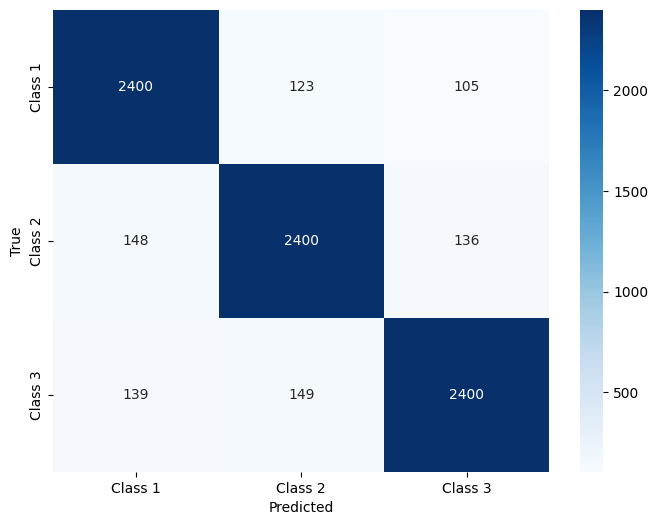

In [ ]:
# Plotting confusion matrix as a heatmap
cm = confusion_matrix(labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()